# TAL Labo 1c : mêmes opérations sur une page web en anglais

**Objectif** 

Dans cette troisième partie du Labo1, vous allez refaire une partie des traitements de la partie 1b, mais cette fois-ci sur une page web, spécifiquement une page Wikipedia en anglais (suggestion : "Switzerland").  L'objectif est de réviser les principales commandes apprises, et de traiter le format HTML.

In [1]:
import nltk
import os
from urllib import request
import matplotlib.pyplot as plt
%matplotlib inline

S'inspirer du [chapitre 3 du livre NLTK](http://www.nltk.org/book/ch03.html) pour faire une requête et récupérer le contenu de la page indiquée dans `url2`.  Quelle est la longueur de la chaîne de caractères obtenue ?

In [2]:
url2 = "https://en.wikipedia.org/wiki/Switzerland" 
response = request.urlopen(url2)
html = response.read().decode('utf8')
print(len(html))

937866


Nous utilserons l'outil `BeautifulSoup` disponible sous forme de module Python pour extraire tout le texte de la page HTML.  Si le contenu de la page est stocké dans `html2`, nous extrayons le texte dans `raw2`.

In [3]:
from bs4 import BeautifulSoup

In [4]:
raw2 = BeautifulSoup(html).get_text()

Réutilisez la méthode de la partie 1b pour enlever le début et la fin de la chaîne `raw2`, car ils contiennent du texte qui n'est pas pertinent pour notre analyse ("ne parle pas de la Suisse").  Quelle est la longueur du résultat ? Afficher aussi ses 100 premiers et 100 derniers caractères (p.ex. `raw2trimmed`).

In [5]:
start = raw2.find("Switzerland, officially the Swiss Confederation,")
LAST_SENTENCE = "Merlot is the main variety produced in Ticino."
end = raw2.rfind(LAST_SENTENCE)

print(start)
print(end)
raw2trimmed = raw2[start:end + len(LAST_SENTENCE)]
print(len(raw2trimmed))
print(raw2trimmed[:100])
print(raw2trimmed[-100:])

7220
95632
88458
Switzerland, officially the Swiss Confederation, is a landlocked country located at the confluence o
 Chasselas (called Fendant in Valais) and Pinot Noir. Merlot is the main variety produced in Ticino.


Effectuer la segmentation en phrases, puis tokeniser chaque phrase.  Ecrivez le résultat (une phrase par ligne, espaces entre *tokens*) dans un fichier `sample_web_page.txt` et inspectez-le avec un éditeur de texte.  Observez-vous des imperfections ?

In [6]:
sentences = nltk.sent_tokenize(raw2trimmed)
tokens = []
for sentence in sentences:
  tokens += [nltk.word_tokenize(sentence)]

filename = "sample_web_page.txt"
# Pour un fichier local : chemin relatif par rapport au notebook
# Pour Google Colab, p.ex.: /content/gdrive/My Drive/sample_web_page.txt
if os.path.exists(filename): 
    os.remove(filename)
fd = open(filename, 'a', encoding='utf8')

for tokens_of_sentence in tokens:
  fd.write(' '.join(tokens_of_sentence) + '\n')

fd.close()

Nous observons que les notes en bas de page gènent la segmentation. Il serait profitable de les enlever car elles suivent toujours un même patterne (un nombre ou une lettre entouré de parenthèses carrées).

Effectuer maintenant la tokenisation de cette page **sans** faire de segmentation en phrases.  Stockez le résultat dans une variable (p.ex. `words2`) sans écrire de fichier.  Combien de tokens possède ce texte ?

In [7]:
words2 = nltk.word_tokenize(raw2trimmed)
print(len(words2))

16788


Créez un objet de type nltk.Text à partir de la liste de *tokens* `words2`.  Appliquez-lui à titre d'exemple les méthodes `concordance`, `similar` et `collocations`. 

In [8]:
nltk_text = nltk.Text(words2)
nltk_text.concordance("country")

Displaying 25 of 33 matches:
iss Confederation , is a landlocked country located at the confluence of Wester
l Charter of 1291 is considered the country 's founding document . Since the Re
est nominal wealth per adult of any country [ 22 ] and the eighth-highest gross
[ 31 ] The Swiss German name of the country , Schwiiz , is homophonous to that 
HF '' for the Swiss franc , and the country top-level domain `` .ch '' , are bo
s centralised the government of the country , effectively abolishing the canton
esentatives elected from across the country ) . Referendums were made mandatory
across the central and south of the country , constituting about 60 % of the co
ry , constituting about 60 % of the country 's area . The majority of the popul
d out of 180 countries . [ 79 ] The country pledged to cut GHG emissions by 50 
itzerland went from a largely rural country to an urban one from 1930 to 2000 .
nd organisations are located in the country , including the International Handb
he urban re

In [9]:
nltk_text.similar("country")

plateau alps population confederacy century war eu constitution second
confederation at and south west east jura largest document reformation
world


In [10]:
nltk_text.collocation_list()

[('citation', 'needed'),
 ('Main', 'article'),
 ('United', 'Nations'),
 ('Main', 'articles'),
 ('St.', 'Gallen'),
 ('Federal', 'Council'),
 ('European', 'Union'),
 ('Swiss', 'Plateau'),
 ('Federal', 'Assembly'),
 ('direct', 'democracy'),
 ('See', 'also'),
 ('per', 'capita'),
 ('Red', 'Cross'),
 ('European', 'countries'),
 ('Holy', 'Roman'),
 ('Statistical', 'Office'),
 ('Catholic', 'Church'),
 ('bilateral', 'agreements'),
 ('deu', 'promoted'),
 ('lat', 'promoted')]

Déterminez le vocabulaire de cette page (la liste des _types_) en convertissant la liste des _tokens_ en un `set`.  
* Veuillez calculer ainsi le vocabulaire de votre texte.
* Combien de mots différents a-t-il ?  (En incluant les ponctuations et tout autre symbole.) 
* Quels sont les mots qui ont plus de 15 lettres ?  (Ou une autre taille qui vous semble intéressante.)

In [11]:
tokens_set = set(words2)
print(len(tokens_set))
tokens_set_filtered = [token for token in tokens_set if len(token) > 15]
print(len(tokens_set_filtered))
print(tokens_set_filtered)

4054
23
['energy-producing', 'instruments/watches', 'Basel-Landschaft', 'Telecommunication', 'non-German-speaking', 'near-Mediterranean', 'Sonderbundskrieg', 'Italian-speaking', 'Franco-Provençal', 'Donau-Iller-Rhine-Limes', 'commander-in-chief', 'authoritarianism', 'machines/electronics', 'Switzerland–European', 'Non-Proliferation', 'SwitzerlandSwiss', 'pastures/grazing', 'Willensnationcode', 'Romansh-speaking', 'hydroelectricity', 'policies—contributes', 'Gallen-Altenrhein', 'autobahn/autoroute']


Construisez un objet `FreqDist` avec les mots de cette page, en convertissant en minuscules tous les mots contenant seulement des lettres (utilisez la méthode `.isalpha()` de Python).  Quels sont les 30 mots les plus fréquents ?

In [12]:
nltk_text2 = [word.lower() for word in nltk_text if word.isalpha()]
fdist = nltk.FreqDist(nltk_text2)
fdist.most_common(30)

[('the', 1127),
 ('of', 550),
 ('and', 440),
 ('in', 430),
 ('to', 232),
 ('switzerland', 212),
 ('a', 182),
 ('swiss', 179),
 ('is', 148),
 ('as', 101),
 ('federal', 92),
 ('by', 87),
 ('are', 87),
 ('was', 86),
 ('for', 81),
 ('with', 73),
 ('from', 68),
 ('it', 60),
 ('at', 52),
 ('world', 52),
 ('on', 50),
 ('has', 46),
 ('its', 43),
 ('most', 41),
 ('population', 39),
 ('one', 39),
 ('an', 38),
 ('cantons', 38),
 ('main', 38),
 ('other', 38)]

Affichez le graphique cumulatif du nombre d'occurrences des 70 mots les plus fréquents de votre texte.

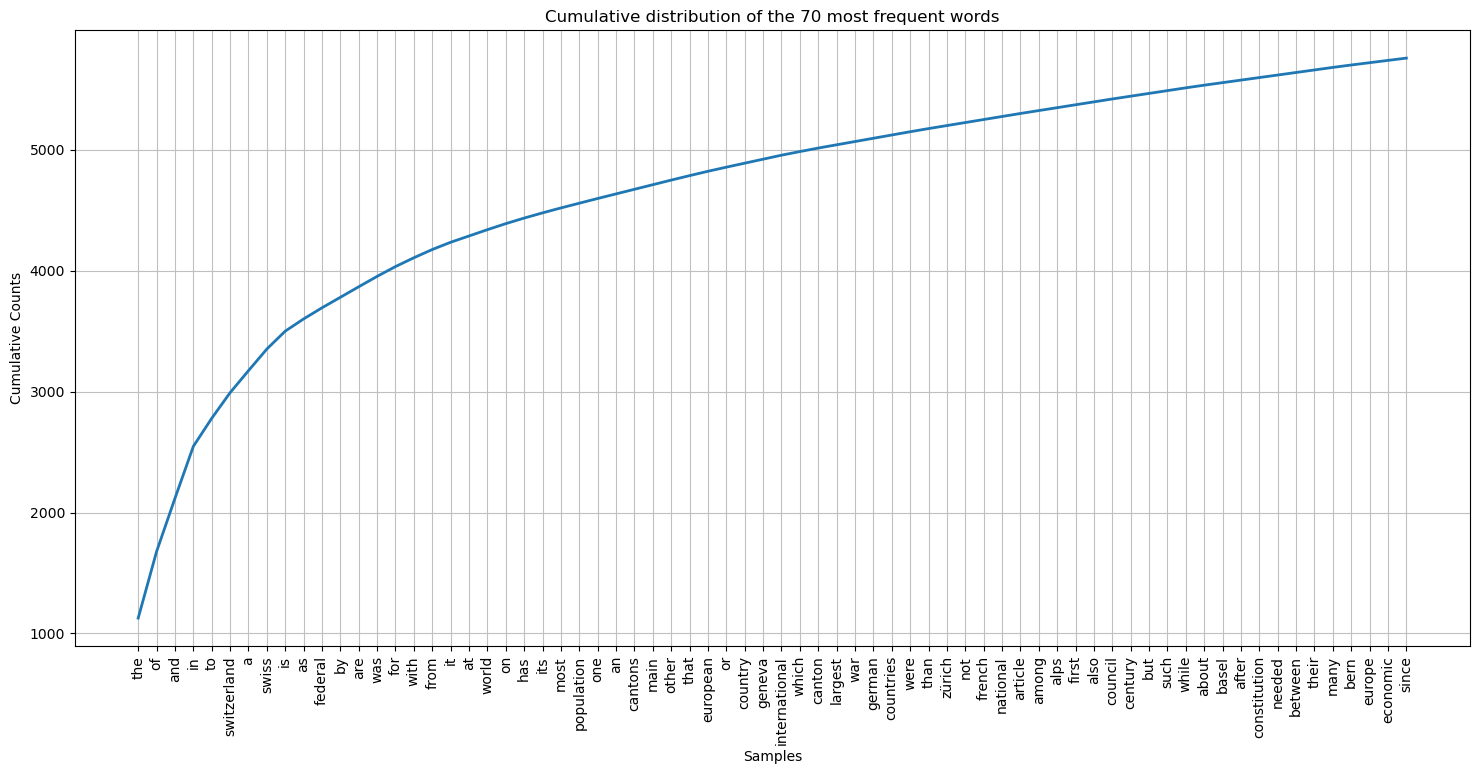

<Axes: title={'center': 'Cumulative distribution of the 70 most frequent words'}, xlabel='Samples', ylabel='Cumulative Counts'>

In [13]:
plt.figure(figsize=(18, 8))
fdist.plot(70, cumulative=True, title="Cumulative distribution of the 70 most frequent words")

Construisez une liste avec la longueur de chaque token du texte, créez un nouvel objet `FreqDist` à partir de cette liste, et affichez la distribution (non-cumulative) des nombres d'occurrences pour chaque longueur.  Qu'observez-vous ?

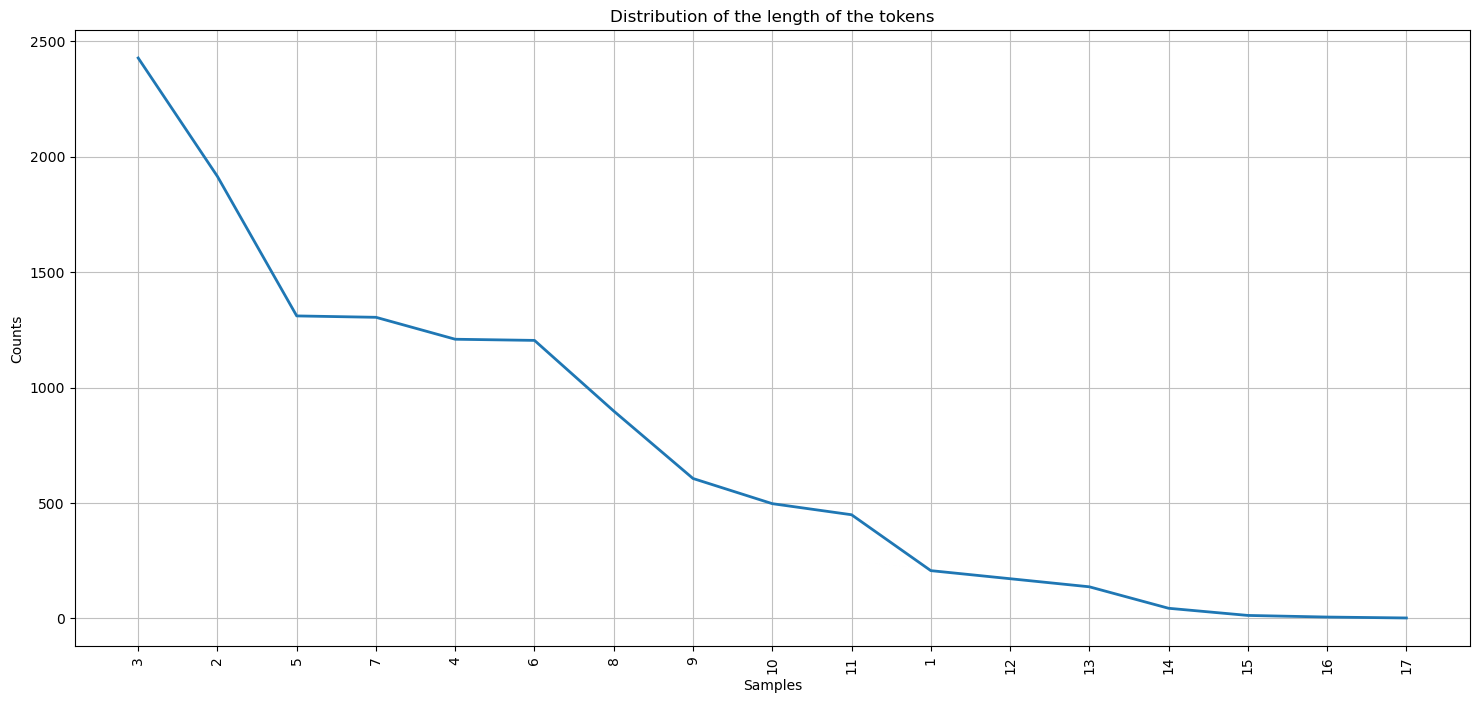

<Axes: title={'center': 'Distribution of the length of the tokens'}, xlabel='Samples', ylabel='Counts'>

In [14]:
tokens_length = [len(token) for token in nltk_text2]
fdist2 = nltk.FreqDist(tokens_length)

plt.figure(figsize=(18, 8))
fdist2.plot(title="Distribution of the length of the tokens")

In [15]:
def print_occurences_of_size(size):
  words = [token for token in nltk_text2 if len(token) == size]
  fdist = nltk.FreqDist(words)
  print(fdist.most_common(10))

In [16]:
print_occurences_of_size(5)

[('swiss', 179), ('world', 52), ('other', 38), ('which', 30), ('among', 24), ('first', 24), ('while', 23), ('about', 22), ('basel', 21), ('after', 21)]


In [17]:
print_occurences_of_size(7)

[('federal', 92), ('cantons', 38), ('country', 33), ('largest', 27), ('article', 25), ('council', 24), ('century', 23), ('between', 21), ('nations', 17), ('foreign', 16)]


In [18]:
print_occurences_of_size(11)

[('switzerland', 212), ('confederacy', 13), ('immigration', 8), ('environment', 6), ('association', 5), ('development', 5), ('referendums', 5), ('traditional', 5), ('established', 4), ('reformation', 4)]


Comme pour la partie B, on remarque que la fréquence diminue en fonction de la longueur des mots.

On remarque que les longueurs de mots les plus fréquentes sont 2 et 3. On suppose qu'on y trouve les mots les plus fréquents en anglais comme "the", "and" ou "is", "of". 

Certaines longueurs plus atypiques comme celles de 5, 7 ou 11 ont une fréquence sensiblement plus élévée car ces longueurs correspondent à des mots comme "swiss", "federal" ou "swizerland" qui sont des mots plus spécifiques à l'article utilisé. 

On comprend alors que la fréquence est fortement liée au contenu du texte analysé.

## Fin de la partie 1c du Labo1
Veuillez nettoyer autant que possible ce _notebook_, exécutez une dernière fois toutes les cellules pour obtenir les résultats demandés, et enregistrez le _notebook_.  Puis ajoutez-le dans une archive _zip_ avec les _notebook_ des parties 1b et 1d, et soumettez l'archive individuellement sur Cyberlearn (_Laboratoire 1_). 